In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product
import minimum_degree as mg

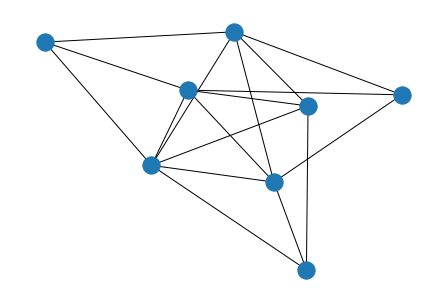

In [2]:
# the demo graph
import random as rnd
seed= 123
G = nx.gnp_random_graph(8,0.4,seed)
pos = nx.spring_layout(G)
nx.draw(G)


In [3]:
# enumerate the edges
for i, (u,v) in enumerate(G.edges()):
    G[u][v]['enum'] = i
# get a list of spanning trees
trees = list(alg.spanning_trees(G))
# count the number of edges
m = len(G.nodes)
# initialize an empty list of rows for the augmented matrix
rows = []

# add rows corresponding to the constraints rho >= 0
for i in range(m):
    row = (m+1)*[0]
    row[i+1] = 1
    rows.append(row)
    
# add rows corresponding to the constraints N*rho >= 1
for tree in trees:
    H = nx.Graph(tree)
    row = [-1] + m*[0]
    for u in H.nodes:
        row[u+1] = H.degree[u]
    rows.append(row)   
# create the polyhedron in cdd
mat = cdd.Matrix(rows, number_type='fraction')
mat.rep_type = cdd.RepType.INEQUALITY
poly = cdd.Polyhedron(mat)
ext = poly.get_generators()
# list of dual objects
dual = []
# loop over extreme points and directions
for i in range(ext.row_size):
    
    # skip extreme directions
    if ext[i][0] == 0:
        continue
        
    # add the vector representation of the dual object
    dual.append(ext[i][1:])
print(len(dual))

23


In [4]:
import numpy as np
import itertools
DUAL = []
for i in range(1,len(G.nodes())+1):
    for S in itertools.combinations(G.nodes(),i):
        S= set(S)
        a=1
        for j in range(1,len(S)):
            for A in itertools.combinations(S,j):
                A= set(A)
                if mg.minimum_degree(G,S) == mg.minimum_degree(G,A) + mg.minimum_degree(G,S.difference(A)):
                    a = 0
        if a == 1:
            row = np.zeros(len(G.nodes()))
            for u in G.nodes():
                    if u in S:
                        row[u]= 1/mg.minimum_degree(G,S)
                    else:
                        row[u]= 0
            DUAL.append(row) 
DUAL= np.array(DUAL)
print(len(DUAL))
if len(dual) == len(DUAL):
    print('Equality test passed')
else:
    print('Equality test not passed')

20
Equality test not passed


In [5]:
good = True
for j in list(DUAL):
    passed = False
    for k in list(dual):
        passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
    if not passed:
         good = False
if good:
    print('Subset test passed')
else:
    print('Subset test not passed') 

Subset test passed


In [6]:
good = True
for j in list(dual):
    passed = False
    for k in list(DUAL):
        passed = np.linalg.norm(np.array(j)- np.array(k)) < 1e-8 or passed
    if not passed:
        good = False
        print(j)
if good:
    print('reverse subset test passed')
else:
    print('reverse subset test not passed')

(Fraction(1, 10), Fraction(1, 5), Fraction(1, 10), Fraction(1, 10), Fraction(1, 10), 0, 0, Fraction(1, 10))
(Fraction(1, 12), Fraction(1, 12), Fraction(1, 6), 0, Fraction(1, 6), 0, Fraction(1, 12), Fraction(1, 12))
(Fraction(1, 10), Fraction(1, 10), Fraction(1, 10), 0, Fraction(1, 10), Fraction(1, 10), 0, Fraction(1, 5))
reverse subset test not passed


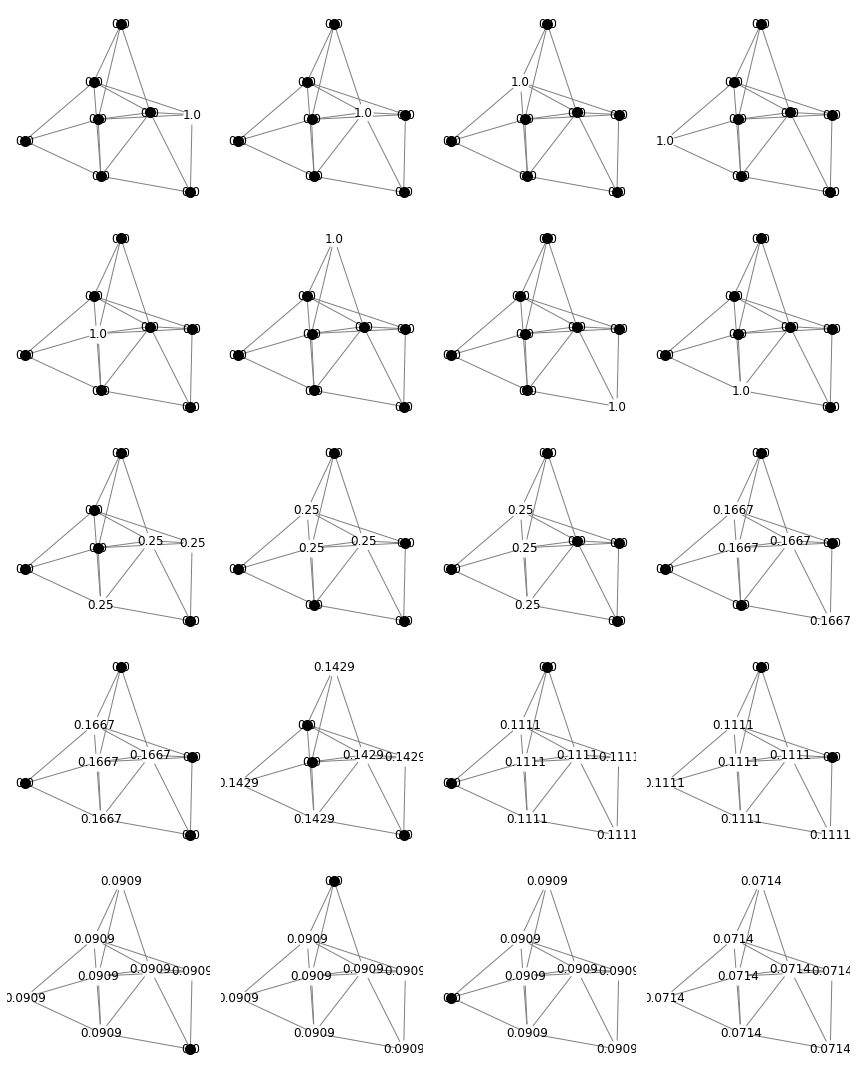

In [7]:
# number of columns and rows for plot
ncol = 4
nrow = int(np.ceil(len(dual)/ncol))

# draw the trees
plt.figure(figsize=(3*ncol,3*nrow))

# draw the blocker
for i, obj in enumerate(np.round_(DUAL, decimals=4, out=None)):
    plt.subplot(nrow,ncol,i+1)
    labels = {u:obj[u] for u in G.nodes}
    nodes = [u for u in G.nodes if obj[u] > 1e-8]
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='white')
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
plt.tight_layout()

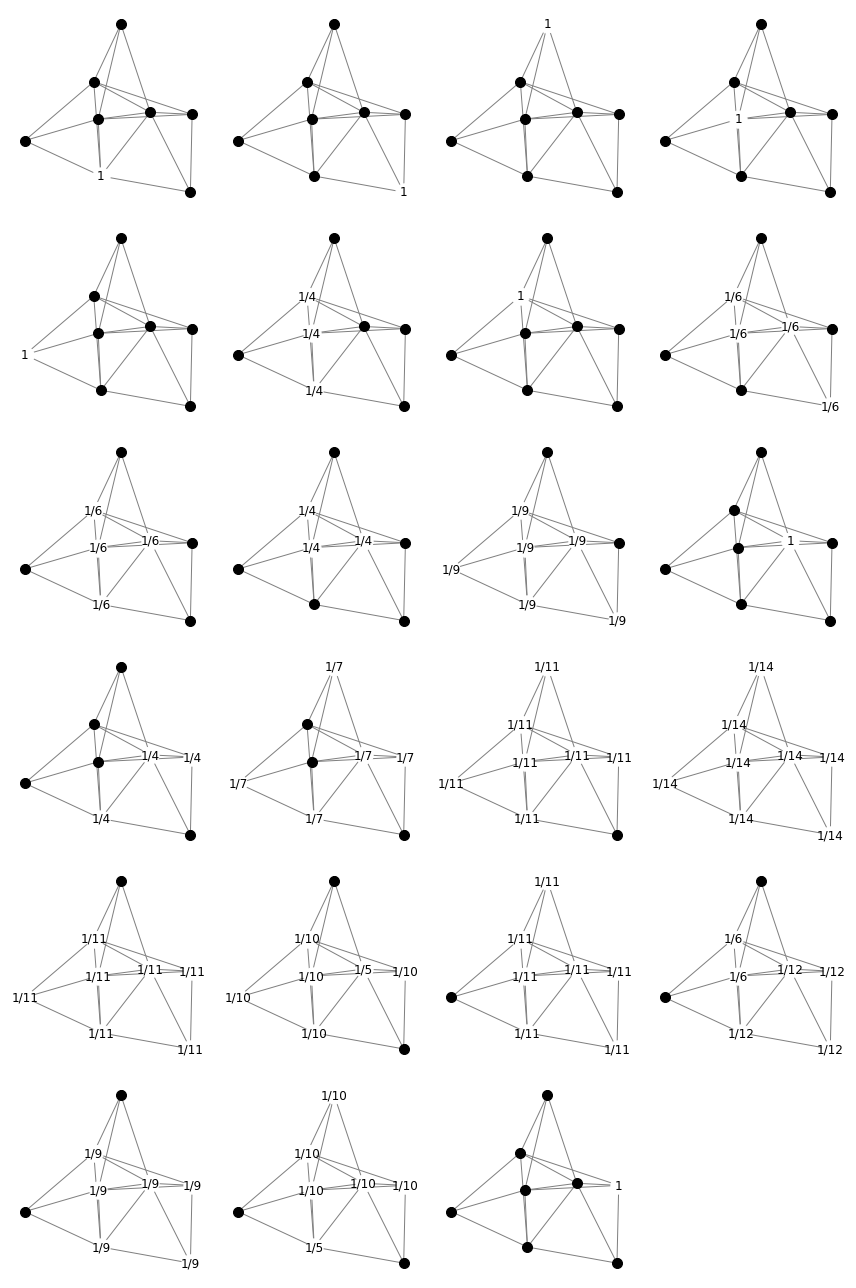

In [8]:
# number of columns and rows for plot
ncol = 4
nrow = int(np.ceil(len(dual)/ncol))

# draw the trees
plt.figure(figsize=(3*ncol,3*nrow))

# draw the blocker
for i, obj in enumerate(dual):
    plt.subplot(nrow,ncol,i+1)
    labels = {u:obj[u] for u in G.nodes}
    nodes = [u for u in G.nodes if obj[u] > 0]
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='white')
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
plt.tight_layout()